# Kapoor, Rajan - Homework 2

We numerically explore the relationship between error distributions, objective functions (least squares versus least absolute deviation, and computational speed.

The following simulation creates a data set according to
$$y_i = \beta_1 + \beta_2 x_i + \beta_3 x_i^2 + \epsilon_i.$$

We generate $n$ observations from this model for $x$ on an equally spaced grid $[0,1]$. For $Yt$, the errors ($\epsilon_i$) have a t-distribution with 2 degrees of freedom. For $Yn$, the errors have a standard normal distribution. We plot each of these data sets and the true regression function.

In [1]:
import numpy as np
np.random.seed(1234)

In [2]:
n = 500
x = np.linspace(0,1,num=n) #Safer than np.arange for floating point
x = x[:,np.newaxis]
X = np.column_stack((np.ones(n),x,x**2))
print(X)

[[  1.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.00000000e+00   2.00400802e-03   4.01604813e-06]
 [  1.00000000e+00   4.00801603e-03   1.60641925e-05]
 ..., 
 [  1.00000000e+00   9.95991984e-01   9.92000032e-01]
 [  1.00000000e+00   9.97995992e-01   9.95996000e-01]
 [  1.00000000e+00   1.00000000e+00   1.00000000e+00]]


In [3]:
beta = np.mat('1;2;4')
print(type(X),type(beta),sep='\n')

<class 'numpy.ndarray'>
<class 'numpy.matrixlib.defmatrix.matrix'>


In [4]:
yt = X*beta + np.random.standard_t(2,size=(n,1))
yn = X*beta + np.random.normal(size=(n,1))

print(X.shape,yt.shape,yn.shape,beta.shape)
print(type(yn))

(500, 3) (500, 1) (500, 1) (3, 1)
<class 'numpy.matrixlib.defmatrix.matrix'>


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

grid = plt.GridSpec(4, 2,wspace=0.4, hspace=0.3)
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams.update({'font.size': 15})

In [6]:
def myfunc(plt):
  plt.ylim(-5, 10);
  plt.plot(X[:,1], X*beta,color='black',linewidth=2)
  plt.xlabel("x")
  plt.ylabel("y")

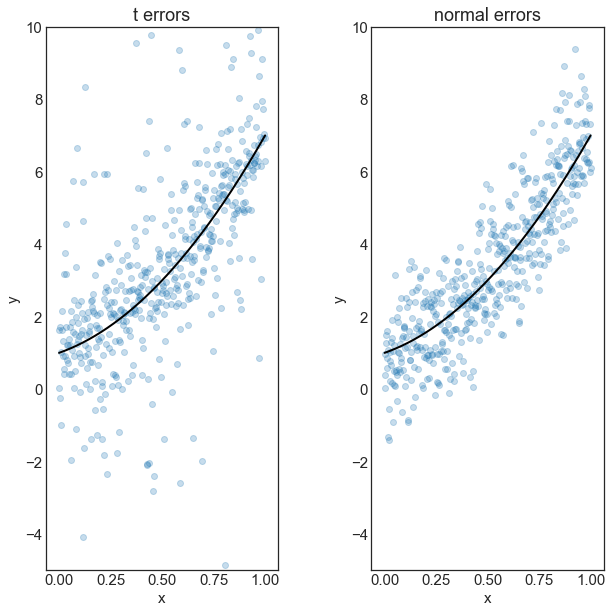

In [7]:
plt.subplot(grid[0:, 0])
plt.scatter(X[:,1], yt, alpha=0.25)
plt.title("t errors")
myfunc(plt)
  
plt.subplot(grid[0:, 1]);
plt.scatter(X[:,1], yn, alpha=0.25)
plt.title("normal errors")
myfunc(plt)

The t distribution produces a lot of outliers (some outliers are not shown because we restricted the y-axis to ylim in each plot). Given the data, out goal is to infer the parameters $\beta$. We will consider two methods. The least squares method we discussed in class is
$$ \beta_{LS} = \text{argmin}_{\beta} (y_i - \beta_1 - \beta_2 x_i - \beta_3 x_i^2)^2 =  \text{argmin}_{\beta} (Y - X\beta)^T(Y - X\beta) = (X^TX)^{-1}X^TY$$
A second possibility is to find the [least absolute deviations](https://en.wikipedia.org/wiki/Least_absolute_deviations) estimator. We call this $\beta_{LAD}$ which has the form
$$\beta_{LAD} = \text{argmin}_{\beta} |y_i - \beta_1 - \beta_2 x_i - \beta_3 x_i^2|.$$
This may also be known as $L_1$ regression or quantile regression with the $0.5$ quantile.

In this homework you will fit both $\beta_{LS}$ and $\beta_{LAD}$ and compare the methods based on parameter estimation accuracy and speed.

## Question 1

Fixing $X$, generate the $Yt$ and $Yn$ data $N=100$ times (note that $n$ is the sample size and $N$ is the number of times we run the simulation). Compute $\beta_{LS}$ and $\beta_{LAD}$ each time. Since $\beta$ is a vector of length $3$, this will result in 4 matrices (LS for $Yt$ and $Yn$ and LAD for $Yt$ and $Yn$) with $N$ rows and 3 columns (you could store this output in other formats as well, but matrices are convenient).

Make scatterplots of $\beta_2$ versus $\beta_3$ estimates for each type of data, estimator. This will produce four scatterplots. Mark the true $\beta_2$ and $\beta_3$ on each plot and comment of the quality of the estimators in the different settings. You scatterplot should look similar to the ones below.

**Tips for Fitting** For fitting $\beta_{LS}$, you have many options in R (lm, lm.fit) and python (scipy.linalg.lstsq, sklearn.linear_model.LinearRegression). For fitting $\beta_{LAD}$ in R you can use l1fit from the package L1pack or  rq.fit from quantreg. For fitting $\beta_{LAD}$ in python the options are somewhat more limited:
* [statsmodels](http://www.statsmodels.org/dev/examples/notebooks/generated/quantile_regression.html) requires use of pandas, calls the quantreg R package
* generic optimizer such as [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)

The later is a more general method that will likely be slower. But scipy.optimize is general and will be useful for many other problems. You may also use any other optimizer you find. 

(requires internet connection to view)

<img src="https://longjp.github.io/statcomp/hw/betaT.png">

(requires internet connection to view)

<img src="https://longjp.github.io/statcomp/hw/betaNorm.png">

In [8]:
N = 100
Yt = X*beta + np.random.standard_t(df=2,size=(n,N))
Yn = X*beta + np.random.normal(size=(n,N))

In [9]:
tBetaLS = np.mat(np.zeros((N,2)))
nBetaLS = np.mat(np.zeros((N,2)))
tBetaLAD = np.mat(np.zeros((N,2)))
nBetaLAD = np.mat(np.zeros((N,2)))

In [10]:
# For LS Linear regresssion using scikit-learn
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True,)

# For LAD Regression using statsmodels
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.regression.quantile_regression import QuantReg

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [11]:
df     = pd.DataFrame(np.column_stack((X,Yt,Yn)))
tStart = X.shape[1]
nStart = X.shape[1]+Yt.shape[1]

In [12]:
for k in np.arange(N):
    # LS Coefficients
    tBetaLS[k]  = model.fit(X, Yt[:,k]).coef_[0][1:3]
    nBetaLS[k]  = model.fit(X, Yn[:,k]).coef_[0][1:3]
    
    # LAD Coefficients
    dfSliced         = df.iloc[:,np.array([0,1,2,tStart+k,nStart+k])]
    dfSliced.columns = ['1', 'x','x2','Yt','Yn']
    tBetaLAD[k]      = smf.quantreg('Yt ~ x+x2', dfSliced).fit(q=.5,max_iter=3000).params.iloc[1:3]
    nBetaLAD[k]      = smf.quantreg('Yn ~ x+x2', dfSliced).fit(q=.5,max_iter=3000).params.iloc[1:3]

In [13]:
%matplotlib inline
plt.style.use('seaborn-white')

grid = plt.GridSpec(2, 2)
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams.update({'font.size': 15})

def actualBeta(plt):
  plt.scatter([beta[1]], [beta[2]],facecolors='white', edgecolors='k',linewidth = 2)
  plt.xlabel(r"$\beta_2$")
  plt.ylabel(r"$\beta_3$")

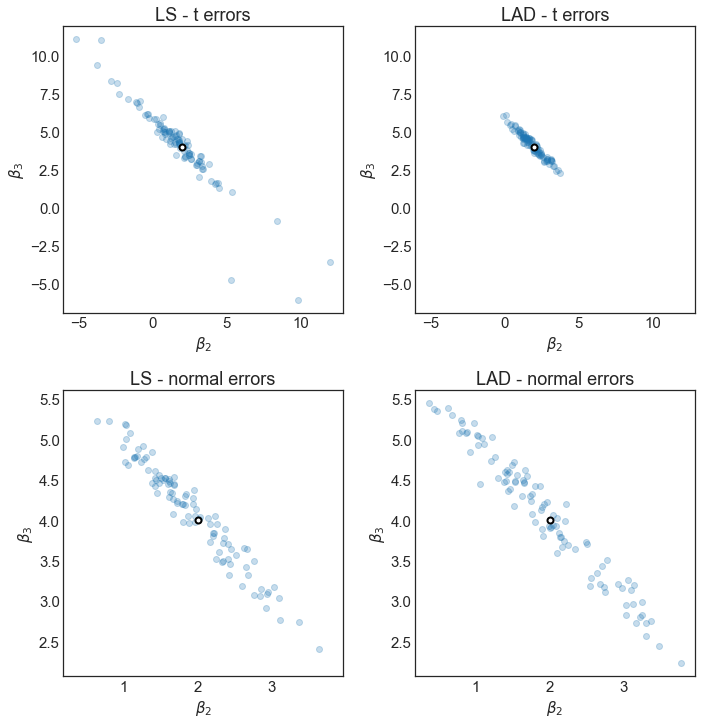

In [14]:
ax0 = plt.subplot(grid[0, 0])
plt.scatter([tBetaLS[:,0]], [tBetaLS[:,1]], alpha=0.25)
plt.title("LS - t errors")
plt.tight_layout()
actualBeta(plt)
  
plt.subplot(grid[0, 1], sharex=ax0, sharey=ax0);
plt.scatter([tBetaLAD[:,0]], [tBetaLAD[:,1]], alpha=0.25)
plt.title("LAD - t errors")
actualBeta(plt)

ax1 = plt.subplot(grid[1, 1]);
plt.scatter([nBetaLAD[:,0]], [nBetaLAD[:,1]], alpha=0.25)
plt.title("LAD - normal errors")
plt.tight_layout()
actualBeta(plt)

plt.subplot(grid[1, 0], sharex=ax1, sharey=ax1)
plt.scatter([nBetaLS[:,0]], [nBetaLS[:,1]], alpha=0.25)
plt.title("LS - normal errors")
actualBeta(plt)


## Question 2

Compare the speed of $\beta_{LS}$ to $\beta_{LAD}$ using a package such as benchmark in R or some of the tools [here](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html) in python. Empirically determine the computational complexity (in $n$) of $\beta_{LAD}$ and $\beta_{LS}$ (we know from theoretical analysis that $\widehat{\beta}_{LS}$ should be linear in $n$).

In [7]:
df1 = pd.DataFrame(np.column_stack((X,yt,yn)))
df1.columns = ['1', 'x','x2','yt','yn']
%timeit -n100 smf.quantreg('yt ~ x+x2', df1).fit(q=.5,max_iter=3000)

100 loops, best of 3: 18 ms per loop


In [8]:
%timeit -n100 smf.quantreg('yn ~ x+x2', df1).fit(q=.5,max_iter=3000)

100 loops, best of 3: 16.1 ms per loop


In [11]:
%timeit model.fit(X, yn)

1000 loops, best of 3: 359 µs per loop


In [12]:
%timeit model.fit(X, yt)

1000 loops, best of 3: 366 µs per loop


In [33]:
# Compute times for LS vs n
for k in np.arange(1,8):
    n = np.power(10,k)
    x = np.linspace(0,1,num=n) #Safer than np.arange for floating point
    x = x[:,np.newaxis]
    X = np.column_stack((np.ones(n),x,x**2))
    yn = X*beta + np.random.normal(size=(n,1))
    print('n = 10e',k)
    %timeit -n100 model.fit(X, yn)

n = 10e 1
1000 loops, best of 3: 337 µs per loop
n = 10e 2
1000 loops, best of 3: 348 µs per loop
n = 10e 3
1000 loops, best of 3: 390 µs per loop
n = 10e 4
1000 loops, best of 3: 871 µs per loop
n = 10e 5
100 loops, best of 3: 7.27 ms per loop
n = 10e 6
10 loops, best of 3: 93.5 ms per loop
n = 10e 7
1 loop, best of 3: 1.23 s per loop


In [10]:
# Compute times for LAD vs n
for k in np.arange(1,7):
    n = np.power(10,k)
    x = np.linspace(0,1,num=n) 
    x = x[:,np.newaxis]
    X = np.column_stack((np.ones(n),x,x**2))
    yn = X*beta + np.random.normal(size=(n,1))
    df2 = pd.DataFrame(np.column_stack((X,yn)))
    df2.columns = ['1', 'x','x2','yn']
    print('n = 10e',k)
    if 1 <= k < 3:
        %timeit -n250 smf.quantreg('yn ~ x+x2', df2).fit(q=.5,max_iter=3000)
    elif 3 <= k < 5:
        %timeit -n150 smf.quantreg('yn ~ x+x2', df2).fit(q=.5,max_iter=3000)
    else:
        %timeit -n5 smf.quantreg('yn ~ x+x2', df2).fit(q=.5,max_iter=3000)

n = 10e 1
250 loops, best of 3: 28.6 ms per loop
n = 10e 2
250 loops, best of 3: 38.1 ms per loop
n = 10e 3
150 loops, best of 3: 51.7 ms per loop
n = 10e 4
150 loops, best of 3: 197 ms per loop
n = 10e 5
5 loops, best of 3: 529 ms per loop
n = 10e 6
5 loops, best of 3: 5.47 s per loop


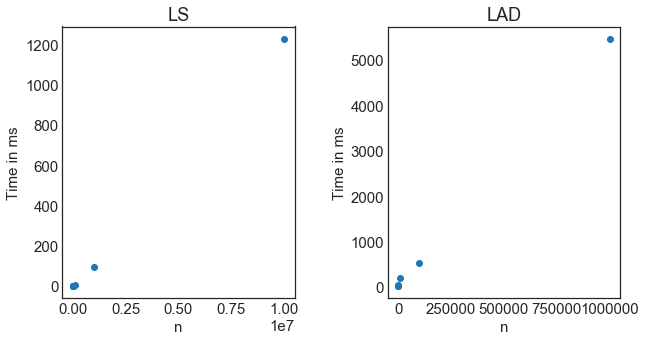

In [15]:
# Plot times
def myLabel(plt,title):
    plt.title(title)
    plt.xlabel('n')
    plt.ylabel('Time in ms')
    
grid = plt.GridSpec(1, 2, wspace=0.4, hspace=0.3)
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 15})

k = np.arange(1,7)
t = np.power(10,k)
t = t[np.newaxis,:]
yLAD = np.array([28.6,38.1,51.7,197,529,5470])
yLAD = yLAD[np.newaxis,:]

plt.subplot(grid[0, 1])
plt.scatter(t,yLAD)
myLabel(plt,'LAD')

k = np.arange(1,8)
t = np.power(10,k)
t = t[np.newaxis,:]
yLS = np.array([.337,.348,.390,.871,7.270,93.500,1230])
yLS = yLS[np.newaxis,:]

plt.subplot(grid[0, 0])
plt.scatter(t,yLS)
myLabel(plt,'LS')

In [16]:
# Show times in a table
timeData = pd.DataFrame(np.column_stack((t.T,yLS.T)),columns = ['t','LS'])
timeData.index += 1

yLAD = np.column_stack((yLAD,0))
timeDataLAD = pd.DataFrame(yLAD.T,columns = ['LAD'])
timeDataLAD.index += 1

timeData = pd.concat([timeData, timeDataLAD],axis=1)
from IPython.display import display
display(timeData)

,t,LS,LAD
1,10.0,0.337,28.6
2,100.0,0.348,38.1
3,1000.0,0.390,51.7
4,10000.0,0.871,197.0
5,100000.0,7.270,529.0
6,1000000.0,93.500,5470.0
7,10000000.0,1230.000,0.0


Seems linear for both LS and LAD.